### Data Loading and Pre-Processing

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

from sklearn.linear_model import LogisticRegression

In [2]:
# Load dataset
data = load_breast_cancer()

X = data.data        # Features (30 features)
y = data.target      # Labels (0 = malignant, 1 = benign)

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (569, 30)
Target vector shape: (569,)


In [3]:
# Convert to DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Train–Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])

Training samples: 455
Validation samples: 114


In [5]:
# Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

- Regularization requires standardized features.
- L1/L2 penalties depend on weight magnitude
- Without scaling: unfair penalty across features

### Baseline Model (No Regularization)

**Model Choice (Logistic Regression (Binary Classification))**
- Suitable for Breast Cancer dataset
- Easy to analyze weights, loss, cost, and accuracy
- Perfect for regularization study

In [6]:
# Train Baseline Model (No Regularization)
baseline_model = LogisticRegression(
    penalty=None,             # No regularization
    solver='saga',            # Supports penalty='none'
    max_iter=5000,
    random_state=42
)

baseline_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=5000, penalty=None, random_state=42, solver='saga')

In [7]:
# Predictions
y_train_pred = baseline_model.predict(X_train)
y_val_pred = baseline_model.predict(X_val)

y_train_prob = baseline_model.predict_proba(X_train)
y_val_prob = baseline_model.predict_proba(X_val)

In [8]:
# Compute Metrics (Loss, Cost, Accuracy)
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)


Training Accuracy: 0.989010989010989
Validation Accuracy: 0.9649122807017544


In [9]:
# Loss (Log Loss)
train_loss = log_loss(y_train, y_train_prob)
val_loss = log_loss(y_val, y_val_prob)

print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)

Training Loss: 0.028643403571480146
Validation Loss: 0.10415242470567054


For baseline model:
  - Loss = Cost (no penalty added)

In [10]:
# Cost Function Value
baseline_cost = train_loss
print("Baseline Cost (No Regularization):", baseline_cost)

Baseline Cost (No Regularization): 0.028643403571480146


Number of weights: 30
Mean weight value: -0.8117420665626672
Max weight value: 7.239839908326216
Min weight value: -4.68155162649208


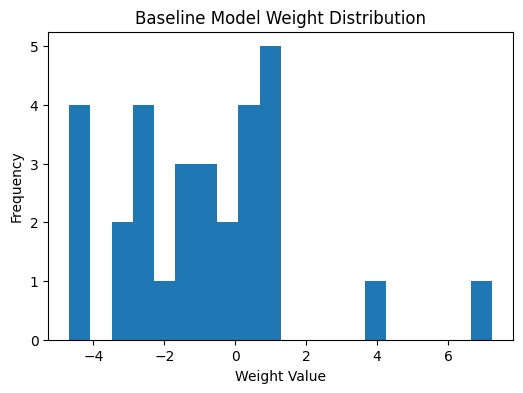

In [11]:
# Weight Analysis (Extract Weights)
weights = baseline_model.coef_[0]

print("Number of weights:", len(weights))
print("Mean weight value:", np.mean(weights))
print("Max weight value:", np.max(weights))
print("Min weight value:", np.min(weights))

plt.figure(figsize=(6,4))
plt.hist(weights, bins=20)
plt.title("Baseline Model Weight Distribution")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.show()

**Table: Performance Metrics – Baseline Model**

| Metric                       | Value                    |
| ---------------------------- | ------------------------ |
| Training Accuracy            | **0.9890**               |
| Validation Accuracy          | **0.9649**               |
| Training Loss                | **0.0286**               |
| Validation Loss              | **0.1042**               |
| Cost Function Value          | **0.0286**               |
| Number of Features (Weights) | **30**                   |
| Mean Weight Value            | **–0.8117**              |
| Maximum Weight               | **7.2398**               |
| Minimum Weight               | **–4.6816**              |
| Weight Sparsity              | **None (0 weights = 0)** |


The baseline logistic regression model achieved **very high training accuracy** (98.9%), indicating strong learning capability on the training data. The validation accuracy (96.49%) is **slightly lower**, suggesting **mild overfitting**.

The **training loss is significantly lower than the validation loss**, further confirming that the model fits the training data more closely than unseen data. Since no regularization was applied, all **30 feature weights remain non-zero**, and some weights exhibit large magnitudes. This unrestricted growth of weights increases model complexity and motivates the use of regularization techniques to **control overfitting and improve generalization**.


### L1 Regularization

**L1 Regularization**:
- Adds |w| (absolute value) penalty to the loss
- Forces less important feature weights → exactly zero
- Performs automatic feature selection
- Helps reduce overfitting

In [12]:
# Train Logistic Regression with L1 Regularization
l1_model = LogisticRegression(
    penalty='l1',
    solver='saga',        # Required for L1
    C=1.0,                # Inverse of regularization strength (λ)
    max_iter=5000,
    random_state=42
)

l1_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, penalty='l1', random_state=42, solver='saga')

In [13]:
# Predictions
y_train_pred_l1 = l1_model.predict(X_train)
y_val_pred_l1 = l1_model.predict(X_val)

y_train_prob_l1 = l1_model.predict_proba(X_train)
y_val_prob_l1 = l1_model.predict_proba(X_val)

In [14]:
# Accuracy
train_acc_l1 = accuracy_score(y_train, y_train_pred_l1)
val_acc_l1 = accuracy_score(y_val, y_val_pred_l1)

print("L1 Training Accuracy:", train_acc_l1)
print("L1 Validation Accuracy:", val_acc_l1)

L1 Training Accuracy: 0.989010989010989
L1 Validation Accuracy: 0.9912280701754386


In [15]:
# Loss (Log Loss)
train_loss_l1 = log_loss(y_train, y_train_prob_l1)
val_loss_l1 = log_loss(y_val, y_val_prob_l1)

print("L1 Training Loss:", train_loss_l1)
print("L1 Validation Loss:", val_loss_l1)

L1 Training Loss: 0.05365568745541631
L1 Validation Loss: 0.07517672818444292



PENALTY
L1 Penalty: 13.918471544084056
Total L1 Cost: 13.972127231539472

SPARSITY ANALYSIS
Total weights: 30
Zero weights (L1 sparsity): 12


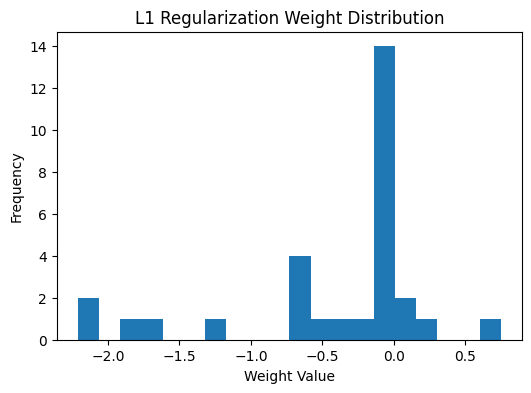

In [16]:
# Cost Function with L1 Penalty

# Extract Weights
weights_l1 = l1_model.coef_[0]

# Compute L1 Penalty
lambda_l1 = 1 / l1_model.C
l1_penalty = lambda_l1 * np.sum(np.abs(weights_l1))

l1_cost = train_loss_l1 + l1_penalty

print("\nPENALTY")
print("L1 Penalty:", l1_penalty)
print("Total L1 Cost:", l1_cost)

# Sparsity Analysis
num_zero_weights = np.sum(weights_l1 == 0)
num_total_weights = len(weights_l1)

print("\nSPARSITY ANALYSIS")
print("Total weights:", num_total_weights)
print("Zero weights (L1 sparsity):", num_zero_weights)

# Weight Distribution Plot
plt.figure(figsize=(6,4))
plt.hist(weights_l1, bins=20)
plt.title("L1 Regularization Weight Distribution")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.show()

**Table: Performance Metrics (L1 Regularized Model)**

| Metric                    | Value       |
| ------------------------- | ----------- |
| Training Accuracy         | **0.9890**  |
| Validation Accuracy       | **0.9912**  |
| Training Loss             | **0.0537**  |
| Validation Loss           | **0.0752**  |
| L1 Penalty                | **13.9185** |
| Total Cost Function Value | **13.9721** |
| Total Weights             | **30**      |
| Zero Weights              | **12**      |
| Weight Sparsity (%)       | **40%**     |

The L1-regularized logistic regression model maintained high training accuracy while achieving a higher validation accuracy (99.12%) compared to the baseline model. This indicates improved generalization performance.

The training and validation losses increased slightly compared to the baseline due to the **addition of the L1 penalty in the cost function**. However, this increase in loss is compensated by reduced overfitting.

A key observation is that **12 out of 30** feature weights were driven exactly to zero, confirming that L1 regularization enforces **sparsity and performs automatic feature selection**. By eliminating less important features, the model becomes simpler, more interpretable, and more robust.

Unlike the baseline model where loss and cost are identical, the L1-regularized model introduces an additional penalty term proportional to the sum of absolute weight values. As a result, the total cost is significantly higher than the training loss. This difference highlights the trade-off between model complexity and predictive performance.


### L2 Regularization

**L2 Regularization**:
- Adds squared weights (‖w‖²) penalty to the cost function
- Shrinks weights smoothly toward zero
- Does NOT create sparsity (weights rarely become exactly zero)
- Improves model stability and reduces overfitting

In [17]:
# Train Logistic Regression with L2 Regularization
l2_model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',       # Default & efficient for L2
    C=1.0,                # Regularization strength
    max_iter=5000,
    random_state=42
)

l2_model.fit(X_train, y_train)


LogisticRegression(max_iter=5000, random_state=42)

In [18]:
# Predictions
y_train_pred_l2 = l2_model.predict(X_train)
y_val_pred_l2 = l2_model.predict(X_val)

y_train_prob_l2 = l2_model.predict_proba(X_train)
y_val_prob_l2 = l2_model.predict_proba(X_val)

In [19]:
# Accuracy
train_acc_l2 = accuracy_score(y_train, y_train_pred_l2)
val_acc_l2 = accuracy_score(y_val, y_val_pred_l2)

print("L2 Training Accuracy:", train_acc_l2)
print("L2 Validation Accuracy:", val_acc_l2)

L2 Training Accuracy: 0.989010989010989
L2 Validation Accuracy: 0.9824561403508771


In [20]:
# Loss (Log Loss)
train_loss_l2 = log_loss(y_train, y_train_prob_l2)
val_loss_l2 = log_loss(y_val, y_val_prob_l2)

print("L2 Training Loss:", train_loss_l2)
print("L2 Validation Loss:", val_loss_l2)

L2 Training Loss: 0.051337108846418865
L2 Validation Loss: 0.07774649384096737


L2 Penalty: 12.88040718438139
Total L2 Cost: 12.931744293227808
Number of weights: 30
Mean weight value: -0.39109855522382375
Max weight value: 0.6483415872660624
Min weight value: -1.25508804169013


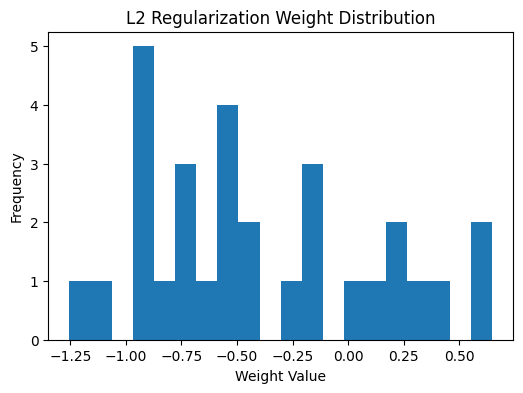

In [21]:
# Cost Function with L2 Penalty

# Extract Weights
weights_l2 = l2_model.coef_[0]

# Compute L2 Penalty
lambda_l2 = 1 / l2_model.C
l2_penalty = lambda_l2 * np.sum(weights_l2 ** 2)

l2_cost = train_loss_l2 + l2_penalty

print("L2 Penalty:", l2_penalty)
print("Total L2 Cost:", l2_cost)

# Weight Magnitude Analysis
print("Number of weights:", len(weights_l2))
print("Mean weight value:", np.mean(weights_l2))
print("Max weight value:", np.max(weights_l2))
print("Min weight value:", np.min(weights_l2))

# Weight Distribution Plot
plt.figure(figsize=(6,4))
plt.hist(weights_l2, bins=20)
plt.title("L2 Regularization Weight Distribution")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.show()

### Elastic Net Regularization

In [22]:
# Train Logistic Regression with Elastic Net

elastic_model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,      # 50% L1 + 50% L2
    C=1.0,
    max_iter=5000,
    random_state=42
)

elastic_model.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, max_iter=5000, penalty='elasticnet',
                   random_state=42, solver='saga')

In [23]:
# Predictions
y_train_pred_en = elastic_model.predict(X_train)
y_val_pred_en = elastic_model.predict(X_val)

y_train_prob_en = elastic_model.predict_proba(X_train)
y_val_prob_en = elastic_model.predict_proba(X_val)

In [24]:
# Accuracy
train_acc_en = accuracy_score(y_train, y_train_pred_en)
val_acc_en = accuracy_score(y_val, y_val_pred_en)

print("Elastic Net Training Accuracy:", train_acc_en)
print("Elastic Net Validation Accuracy:", val_acc_en)

Elastic Net Training Accuracy: 0.989010989010989
Elastic Net Validation Accuracy: 0.9824561403508771


In [25]:
# Loss
train_loss_en = log_loss(y_train, y_train_prob_en)
val_loss_en = log_loss(y_val, y_val_prob_en)

print("Elastic Net Training Loss:", train_loss_en)
print("Elastic Net Validation Loss:", val_loss_en)


Elastic Net Training Loss: 0.05259050808189047
Elastic Net Validation Loss: 0.07671060143124045


Elastic Net L1 Penalty: 15.282395253023306
Elastic Net L2 Penalty: 12.626378845106524
Total Elastic Net Cost: 27.96136460621172
Total weights: 30
Zero weights (Elastic Net): 3
Mean weight: -0.3872023412735813
Max weight: 0.6883027911568437
Min weight: -1.2549154056667713


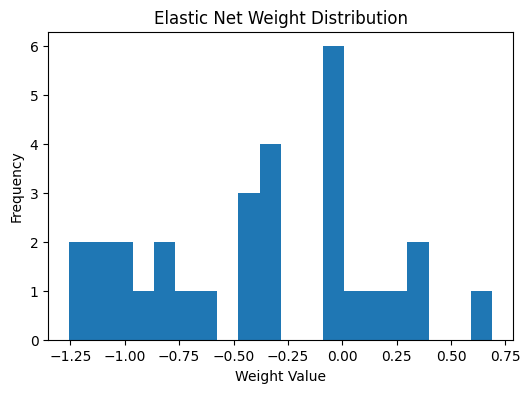

In [26]:
# Cost Function (Elastic Net Penalty)

# Extract Weights
weights_en = elastic_model.coef_[0]

# Compute Penalties
lambda_en = 1 / elastic_model.C

l1_penalty_en = lambda_en * np.sum(np.abs(weights_en))
l2_penalty_en = lambda_en * np.sum(weights_en ** 2)

total_cost_en = train_loss_en + l1_penalty_en + l2_penalty_en

print("Elastic Net L1 Penalty:", l1_penalty_en)
print("Elastic Net L2 Penalty:", l2_penalty_en)
print("Total Elastic Net Cost:", total_cost_en)

# Sparsity + Weight Analysis
zero_weights_en = np.sum(weights_en == 0)

print("Total weights:", len(weights_en))
print("Zero weights (Elastic Net):", zero_weights_en)
print("Mean weight:", np.mean(weights_en))
print("Max weight:", np.max(weights_en))
print("Min weight:", np.min(weights_en))

# Weight Distribution Plot
plt.figure(figsize=(6,4))
plt.hist(weights_en, bins=20)
plt.title("Elastic Net Weight Distribution")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.show()

### Hyperparameter Sensitivity Analysis of Regularization Strength (λ)

In Logistic Regression (sklearn):
- Regularization strength is controlled by C
- λ = 1 / C

| C value | λ value | Effect                |
| ------- | ------- | --------------------- |
| Large C | Small λ | Weak regularization   |
| Small C | Large λ | Strong regularization |


In [27]:
# Define Regularization Strengths
C_values = [0.01, 0.1, 1, 10, 100]

In [29]:
# Containers to Store Results
results = {
    "L1": {"train_loss": [], "val_loss": [], "zero_weights": [], "weight_norm": []},
    "L2": {"train_loss": [], "val_loss": [], "zero_weights": [], "weight_norm": []},
    "Elastic": {"train_loss": [], "val_loss": [], "zero_weights": [], "weight_norm": []}
}

In [30]:
# Train Models for Different λ

# L1 Regularization
for C in C_values:
    model = LogisticRegression(
        penalty='l1',
        solver='liblinear',
        C=C,
        max_iter=5000
    )
    model.fit(X_train, y_train)

    w = model.coef_[0]
    results["L1"]["train_loss"].append(log_loss(y_train, model.predict_proba(X_train)))
    results["L1"]["val_loss"].append(log_loss(y_val, model.predict_proba(X_val)))
    results["L1"]["zero_weights"].append(np.sum(w == 0))
    results["L1"]["weight_norm"].append(np.linalg.norm(w, 1))

In [31]:
# L2 Regularization
for C in C_values:
    model = LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        C=C,
        max_iter=5000
    )
    model.fit(X_train, y_train)

    w = model.coef_[0]
    results["L2"]["train_loss"].append(log_loss(y_train, model.predict_proba(X_train)))
    results["L2"]["val_loss"].append(log_loss(y_val, model.predict_proba(X_val)))
    results["L2"]["zero_weights"].append(np.sum(w == 0))
    results["L2"]["weight_norm"].append(np.linalg.norm(w, 2))

In [32]:
# Elastic Net Regularization
for C in C_values:
    model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        l1_ratio=0.5,
        C=C,
        max_iter=5000
    )
    model.fit(X_train, y_train)

    w = model.coef_[0]
    results["Elastic"]["train_loss"].append(log_loss(y_train, model.predict_proba(X_train)))
    results["Elastic"]["val_loss"].append(log_loss(y_val, model.predict_proba(X_val)))
    results["Elastic"]["zero_weights"].append(np.sum(w == 0))
    results["Elastic"]["weight_norm"].append(np.linalg.norm(w))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


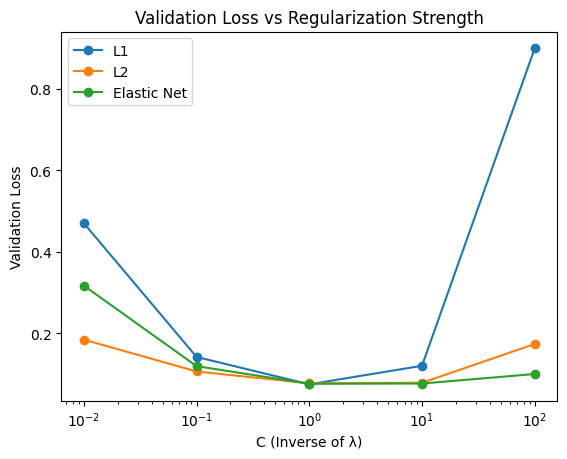

In [34]:
# Plot Loss vs Regularization Strength
plt.figure()
plt.plot(C_values, results["L1"]["val_loss"], marker='o', label='L1')
plt.plot(C_values, results["L2"]["val_loss"], marker='o', label='L2')
plt.plot(C_values, results["Elastic"]["val_loss"], marker='o', label='Elastic Net')
plt.xscale('log')
plt.xlabel("C (Inverse of λ)")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Regularization Strength")
plt.legend()
plt.show()


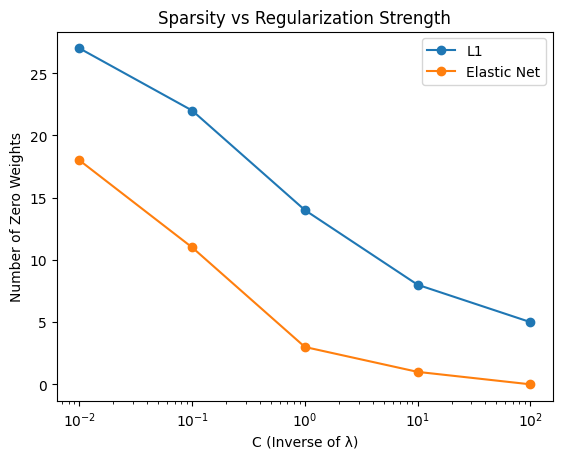

In [35]:
# Plot Sparsity vs Regularization
plt.figure()
plt.plot(C_values, results["L1"]["zero_weights"], marker='o', label='L1')
plt.plot(C_values, results["Elastic"]["zero_weights"], marker='o', label='Elastic Net')
plt.xscale('log')
plt.xlabel("C (Inverse of λ)")
plt.ylabel("Number of Zero Weights")
plt.title("Sparsity vs Regularization Strength")
plt.legend()
plt.show()